## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
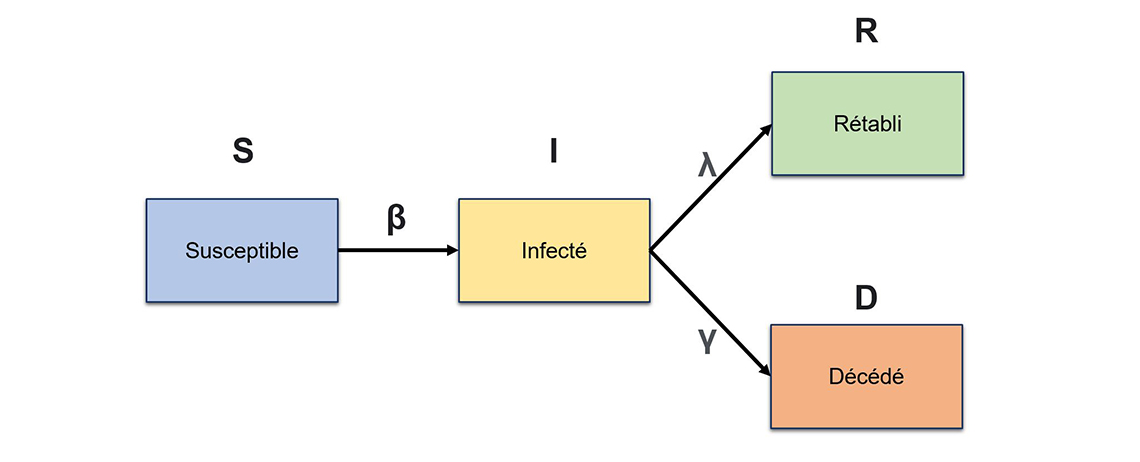


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
#0 et 1
def srid(beta, gamma, mu, s, i, r, d, step, nb_jr):
  S = [s]
  I = [i]
  R = [r]
  D = [d]

  nb_iter = int((nb_jr)/step)

  for i in range (0, (nb_iter-1)):
    S.append(step*(-beta*S[i]*I[i]) + S[i])
    I.append(step*(beta*S[i]*I[i] - gamma*I[i] - mu*I[i]) + I[i])
    R.append(step*(gamma*I[i]) +R[i])
    D.append(step*(mu*I[i])+D[i])

  return S, I, R, D

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [2]:
S, I, R, D = srid(beta= 0.5, gamma= 0.15, mu=0.0015, s=0.99, i=0.01, r=0, d=0, step=0.01, nb_jr=90)
print(S)


[0.99, 0.9899505, 0.9899008324510016, 0.989850996806732, 0.9898009925192813, 0.9897508190390981, 0.9897004758149862, 0.9896499622941003, 0.989599277921942, 0.9895484221423565, 0.9894973943975279, 0.9894461941279759, 0.9893948207725513, 0.9893432737684328, 0.9892915525511224, 0.9892396565544421, 0.9891875852105293, 0.9891353379498334, 0.9890829142011117, 0.9890303133914253, 0.9889775349461356, 0.9889245782888999, 0.9888714428416678, 0.9888181280246772, 0.9887646332564501, 0.9887109579537892, 0.9886571015317732, 0.9886030634037538, 0.988548842981351, 0.9884944396744496, 0.988439852891195, 0.9883850820379894, 0.9883301265194878, 0.9882749857385944, 0.988219659096458, 0.9881641459924687, 0.9881084458242535, 0.9880525579876727, 0.9879964818768158, 0.9879402168839977, 0.9878837623997545, 0.9878271178128398, 0.9877702825102208, 0.9877132558770741, 0.9876560372967822, 0.987598626150929, 0.9875410218192964, 0.98748322367986, 0.9874252311087854, 0.9873670434804245, 0.9873086601673107, 0.98725008

In [3]:
#2
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(S, label='Suceptible')
plt.plot(I, label='Infectes')
plt.plot(R, label='Retablis')
plt.plot(D, label='Decedes')
plt.xlabel('Temps en iterations')
plt.ylabel('Populations')
plt.show()


C:\Users\Firmin\AppData\Local\Temp\ipykernel_17220\2731336183.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [4]:
#1
import pandas as pd

df = 

In [5]:
#2

In [6]:
#3

In [7]:
#4

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

In [8]:
#2

3.